In [420]:
import numpy as np

If possible, update your sklearn version to 1.3.2 to reduce variance in the versions.

In [421]:
#!pip3 install scikit-learn==1.3.2

In [422]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.3.2.


## SVM

In [423]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

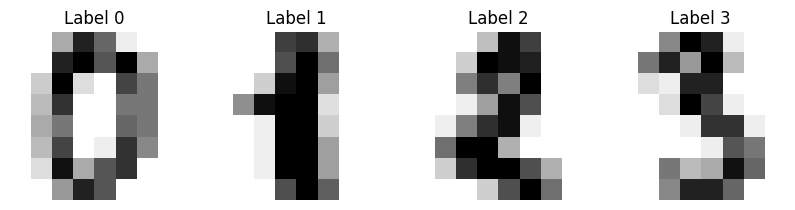

In [424]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Label %i" % label)

In [425]:
# flatten the images
n = len(digits.images)
D = digits.images.reshape((n, -1))
y = digits.target

# Split data into 70% train and 30% test subsets
D_train, D_test, y_train, y_test = train_test_split(
    D, y, test_size=0.3, shuffle=False
)

In [426]:
## 7a
from sklearn.svm import SVC

# Create and train the SVM model with RBF kernel
clf = SVC(kernel='rbf', gamma=0.0005, C=0.9)
clf.fit(D_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(D_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy}')

Accuracy on the test set: 0.9555555555555556


In [427]:
## 7c
n_support_total = clf.n_support_[0] + clf.n_support_[1]

support_total = clf.dual_coef_[0][:n_support_total]
suport_cnt = sum(1 for x in support_total if np.abs(x) > 0)

print(f'The number of suport vectors distinguishing 0 from 1 is: {suport_cnt}')

The number of suport vectors distinguishing 0 from 1 is: 31


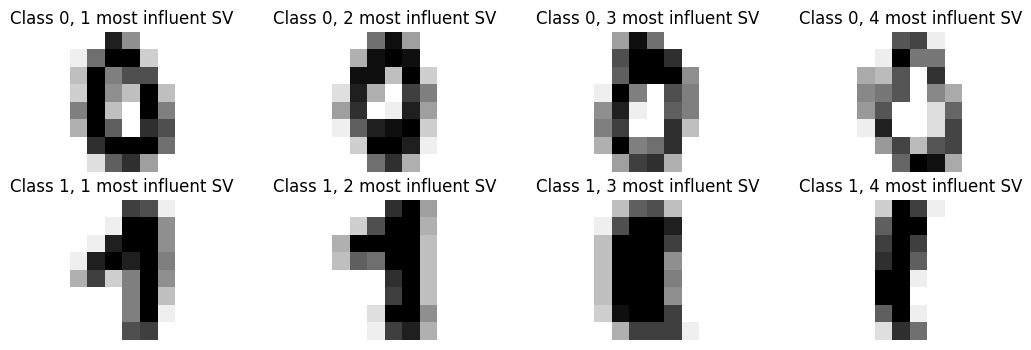

In [428]:
# 7d
support_important_coefs_0 = sorted(support_total, reverse=True)[:4]
support_important_indices_0 = [i for i in range(len(support_total)) if support_total[i] in support_important_coefs_0]
support_important_0 = [clf.support_vectors_[i] for i in support_important_indices_0]
support_important_0_img = [ [vec[i:i+8] for i in range(0, 64, 8)] for vec in support_important_0 ]

support_important_coefs_1 = sorted(support_total)[:4]
support_important_indices_1 = [i for i in range(len(support_total)) if support_total[i] in support_important_coefs_1]
support_important_1 = [clf.support_vectors_[i] for i in support_important_indices_1]
support_important_1_img = [ [vec[i:i+8] for i in range(0, 64, 8)] for vec in support_important_1 ]

support_important_img = [support_important_0_img, support_important_1_img]

_, axes = plt.subplots(nrows=2, ncols=4, figsize=(13, 4))
for row, class_img, class_index in zip(axes, support_important_img, [0, 1]):
    for ax, image, sv_index in zip(row, class_img, [1, 2, 3, 4]):
        ax.set_axis_off()
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
        ax.set_title(f"Class {class_index}, {sv_index} most influent SV")

In [429]:
### 7e 

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.6, 0.8, 1, 2, 4],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}

# Create the SVM model with RBF kernel
gen_red_kernel = SVC(kernel='rbf')

# Create GridSearchCV object with 5-fold cross-validation and accuracy as the scoring metric
grid_search = GridSearchCV(estimator=gen_red_kernel, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the model to the entire dataset
grid_search.fit(D, y)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 4, 'gamma': 0.0005}
0.9744073042401734
